In [2]:
# Imports
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torchsampler import ImbalancedDatasetSampler
from torch.utils.data.sampler import SubsetRandomSampler
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from matplotlib import patches
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:

# Network, ready to use
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, padding=2, padding_mode='zeros')
        self.pool = nn.MaxPool2d(2, 2) #Pooling 2 by 2, window of 2
        self.conv2 = nn.Conv2d(32, 64, 5 , padding=2, padding_mode='zeros')
        #self.conv3 = nn.Conv2d(64, 128, 5, padding=2, padding_mode='zeros')
        self.fc1 = nn.Linear(64 * 9 * 9, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #x = F.relu(self.conv3(x))
        x = x.view(-1, 64 * 9 * 9)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [4]:
# Network creation
net = Net()

In [5]:
# Calculate Entropy error -> test accuracy of model, we want criterion to tend to 0.
# Optimize change network each time to make it better. It's ran between every batches


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Model training

In [6]:

#model.load_state_dict(torch.load(PATH))
net = torch.load("./Saved Models/model_95_test.pt")
net

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=5184, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=2, bias=True)
)

## Multiple Faces Test

In [7]:
originalImage = cv2.imread('./Images Visages/martin.jpg')
image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)/255.

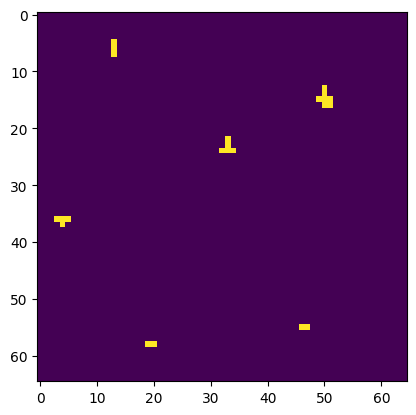

In [8]:
step = 5
size = 36
whole_size = 360
nb_windows = int((whole_size - size + 1)/step)
mat = np.zeros((nb_windows,nb_windows))
cpt = 0
for i in range(nb_windows) :
    for j in range(nb_windows) :
        #cpt+=1
        small_image = image[(step*i):(step*i)+size, (step*j):(step*j)+size]
        #print(cpt, small_image.shape)
        torch_image = torch.from_numpy(small_image).type(torch.FloatTensor)
        torch_image = torch.unsqueeze(torch_image, dim=0)
        torch_image = torch.unsqueeze(torch_image, dim=0)
        outputs = net(torch_image)
        _, predicted = torch.max(outputs.data, 1)
        mat[i][j] = predicted

plt.imshow(mat)

array([[ 88, 268],
       [133, 183],
       [198,  38],
       [ 48,  83],
       [308, 113],
       [293, 248]])

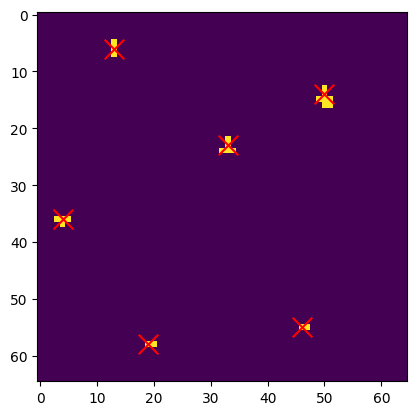

In [9]:
#cluster
array_of_points = [[i, j] for i in range(nb_windows) for j in range(nb_windows) if mat[i][j] == 1]

X = np.array(array_of_points)

clustering = MeanShift(bandwidth=3).fit(X)
centers = clustering.cluster_centers_
#centers = np.reshape(clustering.cluster_centers_, (nb_windows, nb_windows))
centers_faces = centers.astype(int)
plt.imshow(mat)
plt.scatter(centers_faces[:, 1], centers_faces[:, 0], marker="x", color="red", s=200)

#mat_centers = np.zeros((whole_size, whole_size))
#for idx, coord in enumerate(array_of_points):
centers_faces = centers_faces*step + int(size/2)
centers_faces

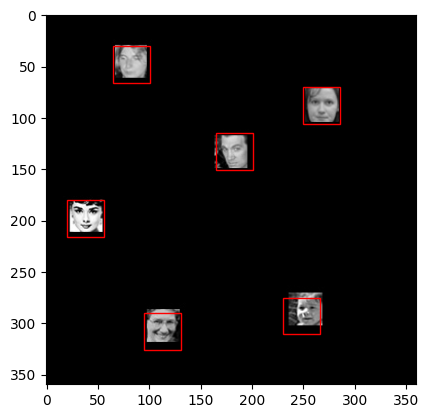

In [12]:
plt.imshow(originalImage)

top_right_corners = np.array(centers_faces)
top_right_corners[:, 1] -= int(size/2)
top_right_corners[:, 0] -= int(size/2)

#plt.scatter(top_right_corners[:, 1], top_right_corners[:, 0], marker="x", color="red", s=200)
ax = plt.gca()
for [x,y] in top_right_corners:
    rect = patches.Rectangle((y,x), size, size, linewidth=1, edgecolor = 'r', facecolor='none')
    ax.add_patch(rect)


In [38]:
# loop over the image pyramid
winH = 36
winW = 36
for resized in image :
    # loop over the sliding window for each layer of the pyramid
    for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        # THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
        # MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
        # WINDOW
        # since we do not have a classifier, we'll just draw the window
        clone = resized.copy()
        cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
        cv2.imshow("Window", clone)
        cv2.waitKey(1)
        time.sleep(0.025)

NameError: name 'sliding_window' is not defined

In [ ]:
inputs, classes = next(iter(test_loader))   

In [43]:
import matplotlib.pyplot as plt

In [44]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [46]:
image_tensor.shape

torch.Size([3, 36, 36])

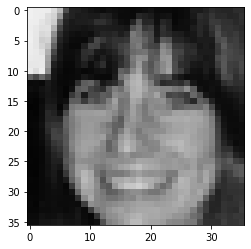

In [45]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

image_tensor = torchvision.utils.make_grid(images[0])
image_label = labels[0]

# show images
imshow(image_tensor)


In [ ]:
labels[0]

### Printing loss according to epoch, to find best model and avoid overfitting

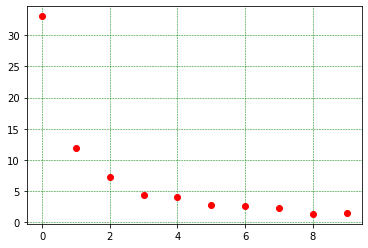

In [38]:

# X axis parameter:
xaxis = range(0, 10)

# Y axis parameter:
yaxis = saved_loss 

plt.plot(xaxis, yaxis, 'ro')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()